<a href="https://colab.research.google.com/github/cle173/Lyric-Generator/blob/main/Lyrics_Generator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries
import pandas as pd
import string, os
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from wordcloud import WordCloud
import nltk
import nltk.data
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
import re
import tensorflow as tf
import keras
import random
import io
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adamax
import sys
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image, ImageDraw, ImageFont

import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
!pip install kaggle

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp '/content/drive/MyDrive/Colab Notebooks/Kaggle/kaggle.json' ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download deepshah16/song-lyrics-dataset

 25% 5.00M/19.9M [00:01<00:03, 4.38MB/s]
100% 19.9M/19.9M [00:01<00:00, 16.7MB/s]


In [ ]:
!unzip song-lyrics-dataset.zip

Archive:  song-lyrics-dataset.zip
  inflating: csv/ArianaGrande.csv    
  inflating: csv/BTS.csv             
  inflating: csv/Beyonce.csv         
  inflating: csv/BillieEilish.csv    
  inflating: csv/CardiB.csv          
  inflating: csv/CharliePuth.csv     
  inflating: csv/ColdPlay.csv        
  inflating: csv/Drake.csv           
  inflating: csv/DuaLipa.csv         
  inflating: csv/EdSheeran.csv       
  inflating: csv/Eminem.csv          
  inflating: csv/JustinBieber.csv    
  inflating: csv/KatyPerry.csv       
  inflating: csv/Khalid.csv          
  inflating: csv/LadyGaga.csv        
  inflating: csv/Maroon5.csv         
  inflating: csv/NickiMinaj.csv      
  inflating: csv/PostMalone.csv      
  inflating: csv/Rihanna.csv         
  inflating: csv/SelenaGomez.csv     
  inflating: csv/TaylorSwift.csv     
  inflating: json files/Lyrics_ArianaGrande.json  
  inflating: json files/Lyrics_BTS.json  
  inflating: json files/Lyrics_Beyonc.json  
  inflating: json files/Lyrics

In [ ]:
!ls csv

ArianaGrande.csv  ColdPlay.csv	    KatyPerry.csv   Rihanna.csv
Beyonce.csv	  Drake.csv	    Khalid.csv	    SelenaGomez.csv
BillieEilish.csv  DuaLipa.csv	    LadyGaga.csv    TaylorSwift.csv
BTS.csv		  EdSheeran.csv     Maroon5.csv
CardiB.csv	  Eminem.csv	    NickiMinaj.csv
CharliePuth.csv   JustinBieber.csv  PostMalone.csv


In [ ]:
df = pd.read_csv('csv/ArianaGrande.csv')
print(df)

            Artist                                       Title  \
0    Ariana Grande                              ​thank u, next   
1    Ariana Grande                                     7 rings   
2    Ariana Grande                             ​God is a woman   
3    Ariana Grande                                Side To Side   
4    Ariana Grande                      ​​no tears left to cry   
..             ...                                         ...   
303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
304  Ariana Grande                                      Magic*   
305  Ariana Grande                                  Right here   
306  Ariana Grande                                     Venuss*   
307  Ariana Grande          One last time_Ariana_Grande_(2014)   

               Album        Date  \
0      thank u, next  2018-11-03   
1      thank u, next  2019-01-18   
2          Sweetener  2018-07-13   
3    Dangerous Woman  2016-05-20   
4          Sweetener  2018-

In [ ]:
# import all singers separately
# all of the csv files except ArianaGrande have an Unnamed starting column 
# need to make sure everything is the same size
col = ['Artist', 'Title', 'Album', 'Date', 'Lyric', 'Year']

df_a = pd.read_csv('csv/ArianaGrande.csv', usecols=col)
df_b = pd.read_csv('csv/BTS.csv', usecols=col)
df_c = pd.read_csv('csv/Beyonce.csv', usecols=col)
df_d = pd.read_csv('csv/BillieEilish.csv', usecols=col)
df_e = pd.read_csv('csv/CardiB.csv', usecols=col)
df_f = pd.read_csv('csv/CharliePuth.csv', usecols=col)
df_g = pd.read_csv('csv/ColdPlay.csv', usecols=col)
df_h = pd.read_csv('csv/Drake.csv', usecols=col)
df_i = pd.read_csv('csv/DuaLipa.csv', usecols=col)
df_j = pd.read_csv('csv/EdSheeran.csv', usecols=col)
df_k = pd.read_csv('csv/Eminem.csv', usecols=col)
df_l = pd.read_csv('csv/JustinBieber.csv', usecols=col)
df_m = pd.read_csv('csv/KatyPerry.csv', usecols=col)
df_n = pd.read_csv('csv/Khalid.csv', usecols=col)
df_o = pd.read_csv('csv/LadyGaga.csv', usecols=col)
df_p = pd.read_csv('csv/Maroon5.csv', usecols=col)
df_q = pd.read_csv('csv/NickiMinaj.csv', usecols=col)
df_r = pd.read_csv('csv/PostMalone.csv', usecols=col)
df_s = pd.read_csv('csv/Rihanna.csv', usecols=col)
df_t = pd.read_csv('csv/SelenaGomez.csv', usecols=col)
df_u = pd.read_csv('csv/TaylorSwift.csv', usecols=col)

df_all = [df_a, df_b, df_c, df_d, df_e, df_f, df_g, df_h, df_i, df_j, df_k, df_l, df_m, df_n, df_o, df_p, df_q, df_r, df_s, df_t, df_u]

In [ ]:
print(df_all[:2])

[            Artist                                       Title  \
0    Ariana Grande                              ​thank u, next   
1    Ariana Grande                                     7 rings   
2    Ariana Grande                             ​God is a woman   
3    Ariana Grande                                Side To Side   
4    Ariana Grande                      ​​no tears left to cry   
..             ...                                         ...   
303  Ariana Grande  God is a Woman (Excuse me i love you LIVE)   
304  Ariana Grande                                      Magic*   
305  Ariana Grande                                  Right here   
306  Ariana Grande                                     Venuss*   
307  Ariana Grande          One last time_Ariana_Grande_(2014)   

               Album        Date  \
0      thank u, next  2018-11-03   
1      thank u, next  2019-01-18   
2          Sweetener  2018-07-13   
3    Dangerous Woman  2016-05-20   
4          Sweetener  2018

In [ ]:
# check that they all have the same columns checked 
for i in range(len(df_all)):
  print(df_all[i].shape)

(308, 6)
(278, 6)
(406, 6)
(145, 6)
(75, 6)
(75, 6)
(344, 6)
(466, 6)
(247, 6)
(296, 6)
(521, 6)
(348, 6)
(325, 6)
(64, 6)
(402, 6)
(197, 6)
(323, 6)
(148, 6)
(405, 6)
(175, 6)
(479, 6)


In [ ]:
# function to split the text of lyrics to  single words, removing stopwords and doing the lemmatization to each word
def lyrics_to_words(document):
    stop_words = set(stopwords.words('english'))
    exclude = set(string.punctuation)
    lemma = WordNetLemmatizer()
    stopwordremoval = " ".join([i for i in document.lower().split() if i not in stop_words])
    punctuationremoval = ''.join(ch for ch in stopwordremoval if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punctuationremoval.split())
    return normalized

In [ ]:
def toword(df):
    def unique(list1):
       # intilize a null list
         unique_list = []
       # traverse for all elements
         for x in list1:
             # check if exists in unique_list or not
             if x not in unique_list:
                  unique_list.append(x)
         return unique_list
    
    #Stores unique words of each lyrics song into a new column called words
    #list used to store the words
    words = []
    #iterate trought each lyric and split unique words appending the result into the words list
    df = df.reset_index(drop=True)
    for word in df['Lyric'].tolist():
        words.append(unique(lyrics_to_words(word).split()))
    #create the new column with the information of words lists
    df['words'] = words
    return df

In [ ]:
# function to count the words
def countword(df):    
    
    c=[]
    for word in df['words']:
        for w in word:
            c.append(w)
    return c

In [ ]:
# function to get word statistics
def words_stats(df,main_df):
    unique_words = []
    total_words = []
    total_news = []
    name = []
    
    for value in df.columns[1:]:
        unique_words.append(np.count_nonzero(df[value]))
        total_words.append(sum(df[value]))
        name.append(str(value))
        total_news.append(main_df['name'][main_df['name']==value].count())
        data = pd.DataFrame({'name':name,
                          'unique words':unique_words,
                          'total words':total_words,
                          'total songs':total_news})
    data['words per songs'] = round(data['total words'] / data['total songs'],0)
    data['words per songs'] = data['words per songs'].astype('int')
    return data

In [ ]:
# function to clean up artist songs; a lot of the songs are different versions of the same song e.g live or remix versions
def cleaning(df):
    a=[]
    i=0
    df1=df
    title = df['Title']
    for t in df['Title']:
        r=Re=l=Li=c=m=V=ve=D=rs=0
        r=t.find('remix')
        Re=t.find('Remix')
        l=t.find('live')
        Li=t.find('Live')
        V=t.find('Version')
        ve=t.find('version')
        D=t.find('Demo ')
        D=t.find('Demo')
        rs=t.find('Reprise')
        c=t.find('COPY')
        m=t.find('Mix')
        if r != -1:
            a.append(t)
        elif Re != -1:
            a.append(t)
        elif l != -1:
            a.append(t)
        elif Li != -1:
            a.append(t)
        elif V != -1:
            a.append(t)
        elif ve != -1:
            a.append(t)
        elif D != -1:
            a.append(t)
        elif rs != -1:
            a.append(t)
        elif c != -1:
            a.append(t)
        elif m != -1:
            a.append(t)
    
    for t1 in df['Title']:
        for t2 in a:
            if t1 == t2:
                df1=df1.drop(i)
        i=i+1
    
    df1.dropna(subset = ["Title"], inplace=True)
    df1.dropna(subset = ["Lyric"], inplace=True)
    df1.drop_duplicates(subset ="Title",keep = False, inplace = True)
    df1.drop_duplicates(subset ="Lyric",keep = False, inplace = True) 
    
    
    return df1

In [ ]:
df_allc=[]
for df in df_all:
    df_c=cleaning(df)
    df_w=toword(df_c)
    df_allc.append(df_w)

frames=df_allc
df_main = pd.concat(frames,ignore_index=True)
df_main=df_main.reset_index(drop=True)

In [ ]:
before = []
after = []
length = []
ulength = []
wd = []

for df in df_all:
    a,b = df.shape
    before.append(a)
    
for dfc in df_allc:
    a,b = dfc.shape
    after.append(a)  
    c=countword(dfc)
    l=len(c)
    ul=len(np.unique(c))
    wd.append(c)
    length.append(l)
    ulength.append(ul)

In [ ]:
artists=['Ariana Grande', 'BTS','Beyonce','Billie Eilish','Cardi B', 'Chralie Puth', 'Cold Play', 'Drake', 'Dua Lipa', 'Ed Sheeran', 
         'Eminem','Justin Bieber','Katy Perry', 'Khalid', 'Lady Gaga','Maroon 5', 'Nicki Minaj', 'Post Malone','Rihanna','Selena Gomez', 'Taylor Swift']
category = {'name':artists,'before':before,'after':after,'words':wd,'unique words':ulength,'word count':length}
df_info = pd.DataFrame.from_dict(category, orient='index')
df_info = df_info.transpose()
df_info['diff']=df_info['before']-df_info['after']
df_info['words per songs'] = round(df_info['word count'].astype(float) / df_info['after'].astype(float),0)
df_info['words per songs'] = df_info['words per songs'].astype('int')
df_info['lexicalrichness']=(df_info['unique words']/df_info['word count'])*100
df_info=df_info[['name','before','after','diff','words','words per songs','unique words','word count','lexicalrichness']]
df_info

name before after diff  \
0   Ariana Grande    308   202  106   
1             BTS    278   237   41   
2         Beyonce    406   224  182   
3   Billie Eilish    145    73   72   
4         Cardi B     75    69    6   
5    Chralie Puth     75    65   10   
6       Cold Play    344   225  119   
7           Drake    466   420   46   
8        Dua Lipa    247   111  136   
9      Ed Sheeran    296   202   94   
10         Eminem    521   470   51   
11  Justin Bieber    348   268   80   
12     Katy Perry    325   191  134   
13         Khalid     64    50   14   
14      Lady Gaga    402   236  166   
15       Maroon 5    197   125   72   
16    Nicki Minaj    323   279   44   
17    Post Malone    148   128   20   
18        Rihanna    405   248  157   
19   Selena Gomez    175   108   67   
20   Taylor Swift    479   363  116   

                                                words  words per songs  \
0   [thought, id, end, sean, match, wrote, song, r...               65   
1   [jungkook, cause, im, star, tonight, watch, br...              187   
2   [beyoncé, ive, drinkin, get, filthy, liquor, t...               85   
3   [know, im, good, ive, learned, lose, cant, aff...               51   
4   [cardi, b, al, mclaran, megan, thee, stallion,...              112   
5   [woahoh, hmhmm, runnin, round, throwin, dirt, ...               61   
6   [come, meet, tell, im, sorry, know, lovely, fi...               46   
7   [wishin, yeah, movin, calm, start, trouble, tr...              141   
8   [one, talkin, sleep, night, makin, crazy, mind...               66   
9   [club, best, place, find, lover, bar, go, frie...               92   
10  [look, gonna, go, easy, hurt, feeling, im, goi...              223   
11  [produced, benny, blanco, time, rained, parade...               70   
12  [refrain, know, strut, fuck, katy, perry, tige...               69   
13  [still, thinking, like, know, give, everything...               67   
14  [lady, gaga, r, kelly, yeah, oh, turn, mic, eh...               73   
15  [adam, levine, say, hey, baby, oh, mama, play,...               62   
16  [nicki, minaj, yo, never, fucked, wayne, drake...              122   
17  [post, malone, hahahahaha, tank, god, ayy, ive...               85   
18  [rihanna, work, said, haffi, see, mi, dirt, pu...               66   
19  [promised, world, fell, put, first, adored, se...               53   
20  [vintage, tee, brand, new, phone, high, heel, ...               85   

   unique words word count lexicalrichness  
0          3394      13193       25.725764  
1         20276      44343       45.725368  
2          4980      19041       26.154089  
3          1519       3720       40.833333  
4          2507       7710       32.516213  
5          1297       3953       32.810524  
6          2692      10271       26.209717  
7          9770      59082       16.536339  
8          2113       7292       28.976961  
9          4490      18650       24.075067  
10        18784     104805       17.922809  
11         3752      18659       20.108259  
12         3605      13202       27.306469  
13         1344       3346       40.167364  
14         4299      17147       25.071441  
15         1841       7724       23.834801  
16         8185      34067       24.026184  
17         3091      10823       28.559549  
18         2869      16391       17.503508  
19         1965       5676        34.61945  
20         5577      30710       18.160208

In [ ]:
fig = go.Figure(data=[
    go.Bar(name='Unique Word Count', x=df_info['name'], y=df_info['unique words'].tolist()),
    go.Bar(name='Total Word Count', x=df_info['name'], y=df_info['word count'].tolist()),
    
])
# Change the bar mode
fig.update_layout(barmode='group',title={'text': "Total words vs Unique words",'y':0.9,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

In [ ]:
print(df_info[df_info.lexicalrichness == max(df_info['lexicalrichness'])].loc[:,'name'])
print(max(df_info['lexicalrichness']))
fig = px.bar(df_info, x='name',y='lexicalrichness')
fig.update_layout(title={'text': "Lexicalrichness of all artist",'y':1,'x':0.5,'xanchor': 'center','yanchor': 'top'})
fig.show()

1    BTS
Name: name, dtype: object
45.725368152808784


Ariana Grande


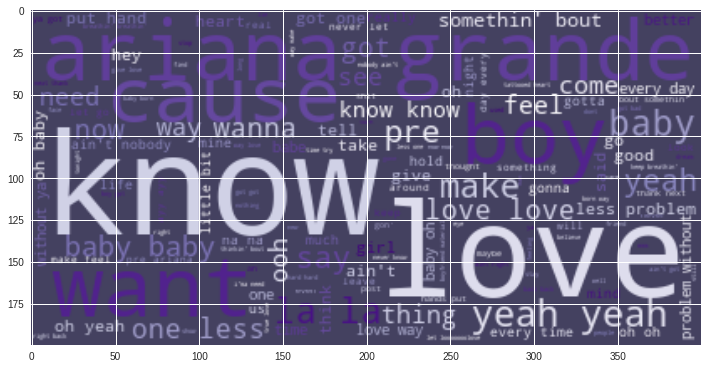

BTS


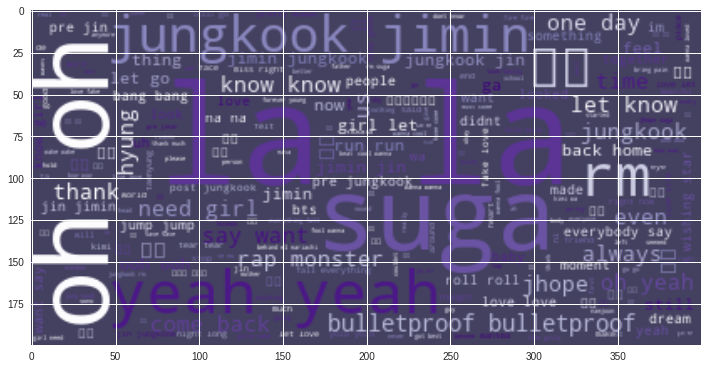

Beyonce


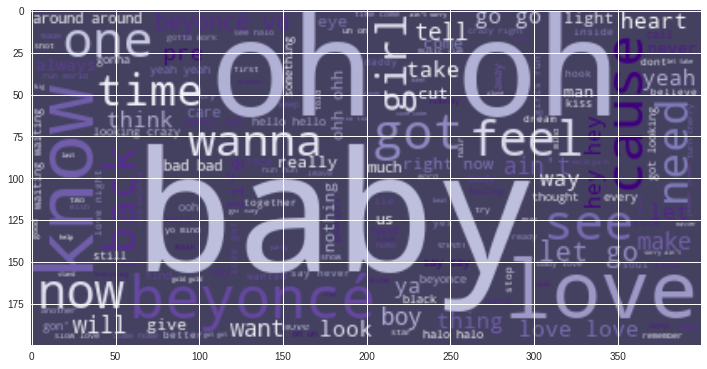

Billie Eilish


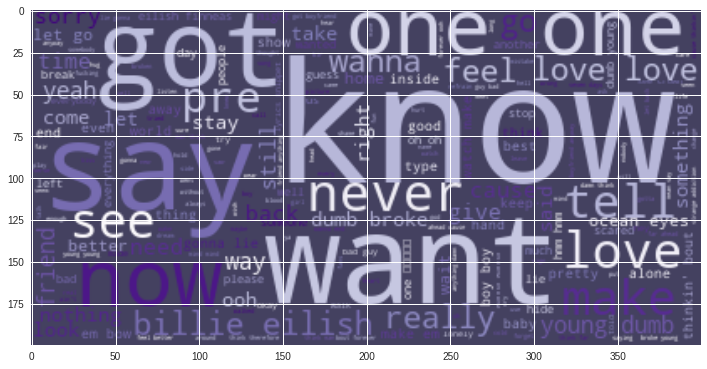

Cardi B


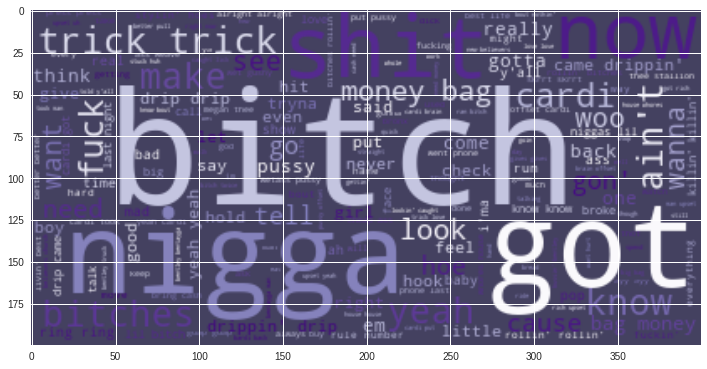

Chralie Puth


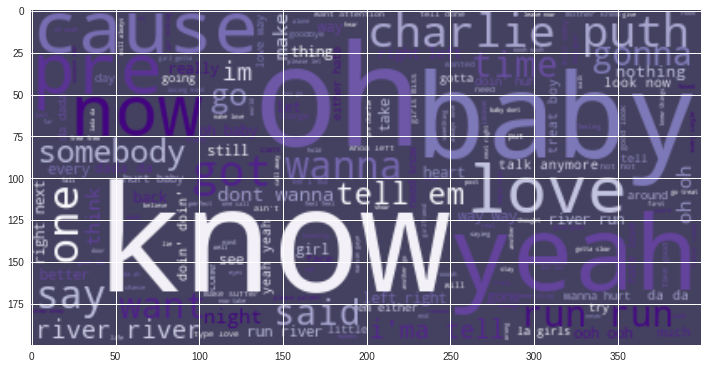

Cold Play


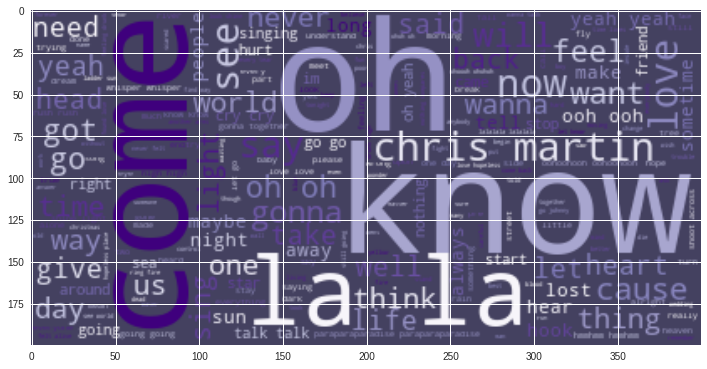

Drake


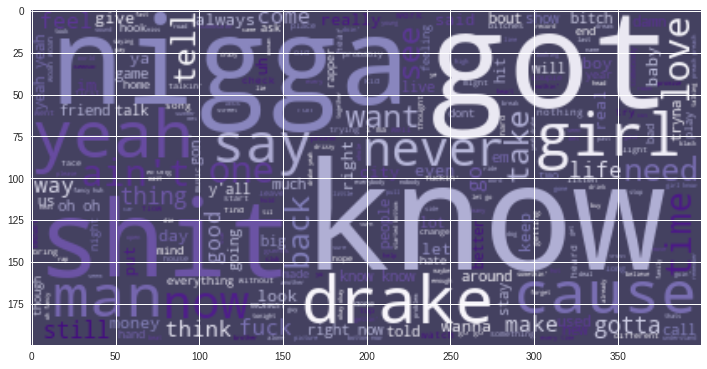

Dua Lipa


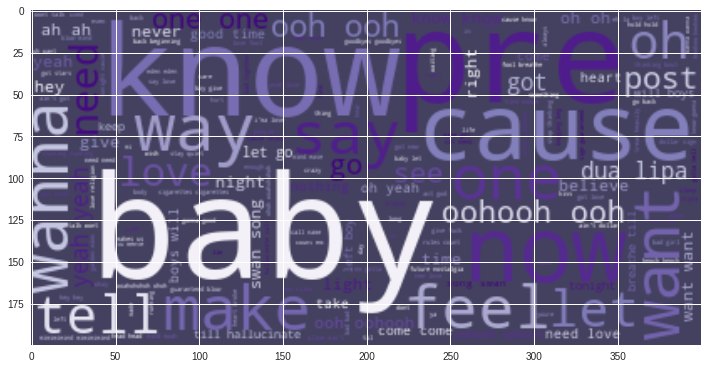

Ed Sheeran


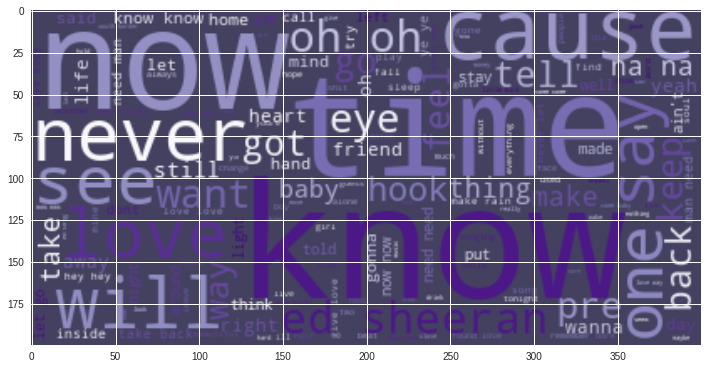

Eminem


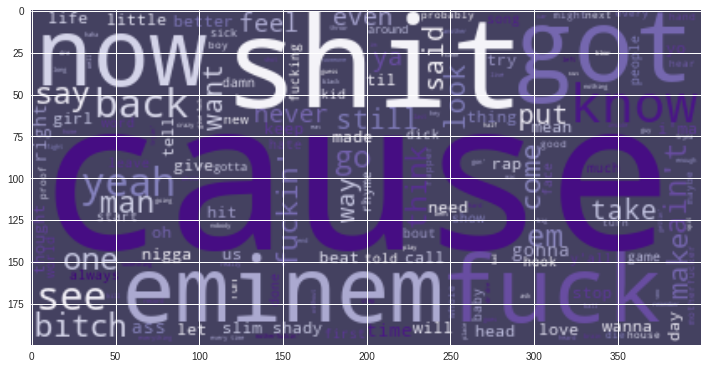

Justin Bieber


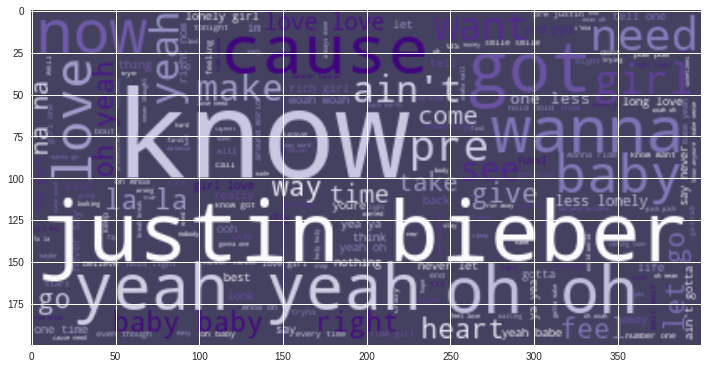

Katy Perry


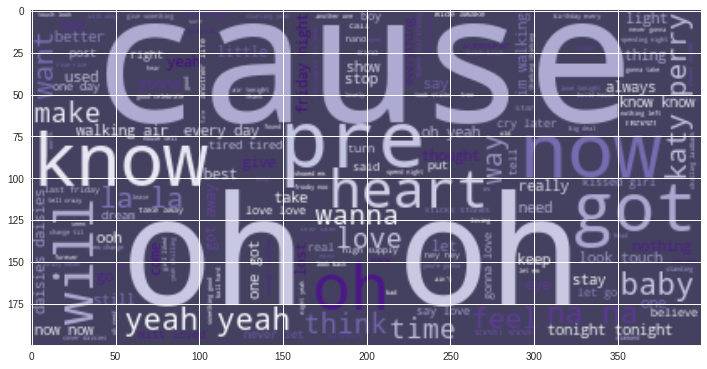

Khalid


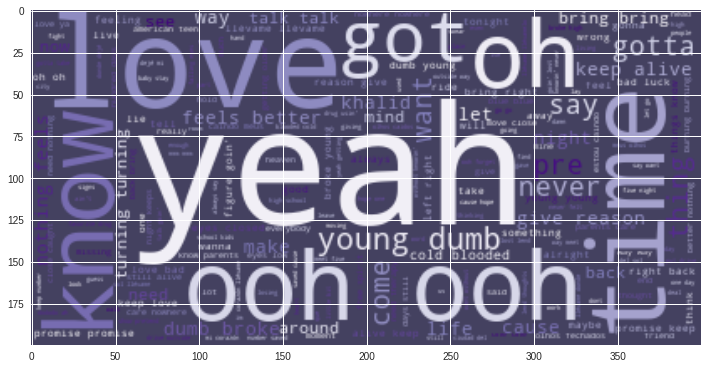

Lady Gaga


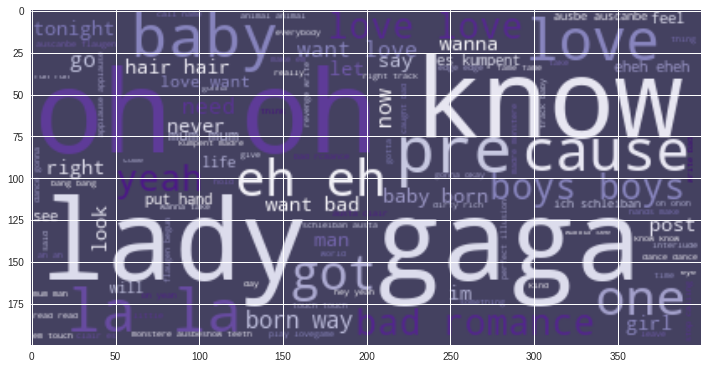

Maroon 5


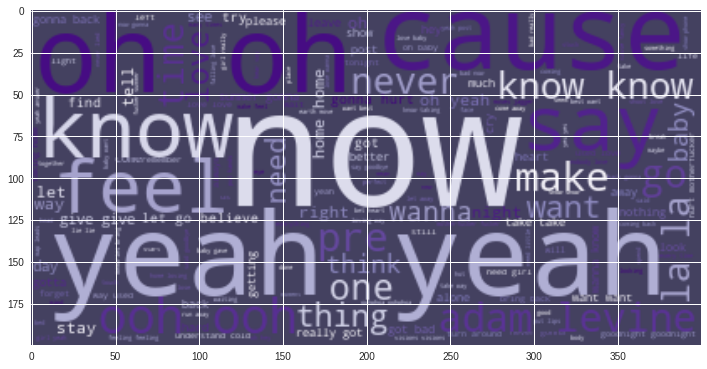

Nicki Minaj


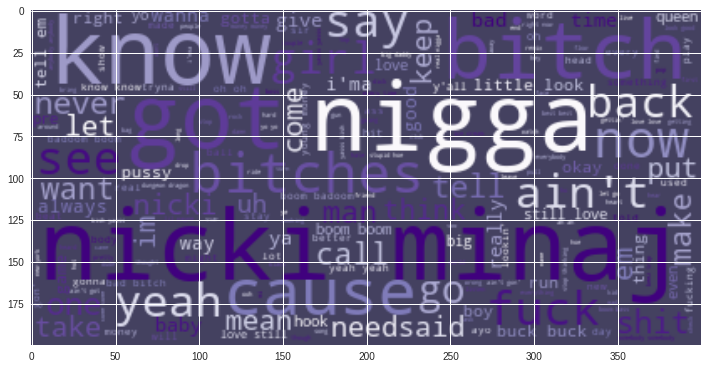

Post Malone


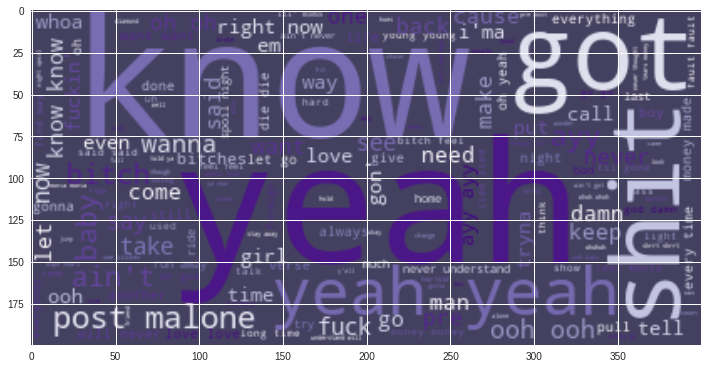

Rihanna


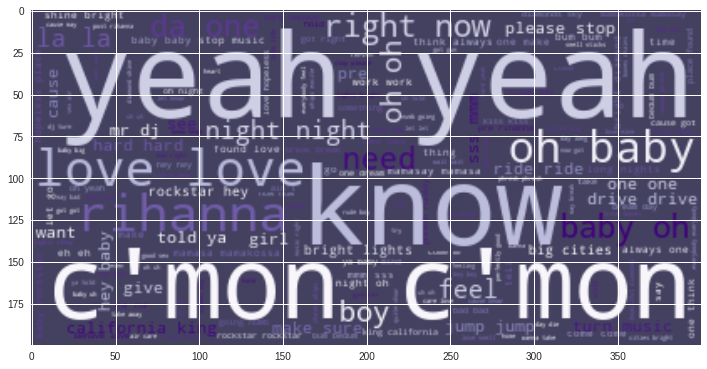

Selena Gomez


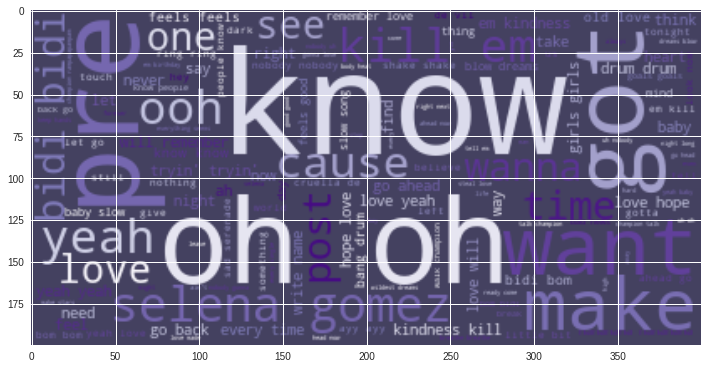

Taylor Swift


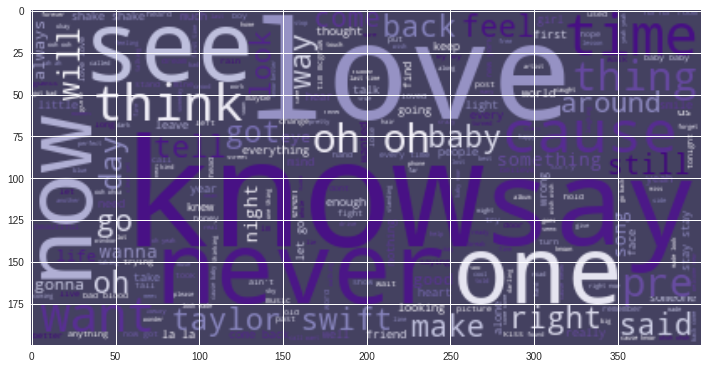

In [ ]:
# Generate a word cloud image for each artist

for i in range(len(df_allc)):
  stopwords = set(STOPWORDS)
  print(artists[i])
  wordcloud = WordCloud(stopwords=stopwords, background_color="#444160",colormap="Purples", max_words=800).generate(" ".join(str(x) for x in (df_allc[i]["Lyric"])))
  plt.figure(figsize=(12,12))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.show()


In [ ]:
# creating a corpus from all of the lyrics
Corpus =''
for i in range(len(df_allc)):
  for listitem in df_allc[i].Lyric:
    Corpus += str(listitem)

# convert all letters to lowercase
Corpus = Corpus.lower() 
print("Number of unique characters:", len(set(Corpus)))

Number of unique characters: 2647


In [ ]:
# print all the unique characters present in the Corpus
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\t', ' ', "'", '0', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\xa0', '¾', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'ü', 'ý', 'ā', 'ą', 'ć', 'č', 'ď', 'đ', 'ē', 'ė', 'ę', 'ě', 'ğ', 'ī', 'ı', 'ł', 'ň', 'ō', 'ő', 'œ', 'ř', 'ś', 'ş', 'š', 'ť', 'ū', 'ů', 'ű', 'ź', 'ż', 'ž', 'ǎ', 'ǐ', 'ǒ', 'ǔ', 'ǚ', 'ɔ', 'ɛ', 'ɲ', 'ά', 'έ', 'ή', 'ί', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω', 'ό', 'ύ', 'ώ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'א', 'ד', 'ל', 'آ', 'أ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ـ', 'ف

In [ ]:
# \n, 1, and some other punctiation missing
missing = ['\n', ' ', '"', ',', '.', '1']

for i in range(len(missing)):
  Corpus += missing[i]

In [ ]:
# remove non-english characters and symbols
# might cause issues since some of the BTS songs are in Korean


to_remove = [ '\xa0', '¾', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ù', 'ú', 'ü', 'ý', 'ā', 'ą', 'ć', 'č', 'ď', 'đ', 'ē', 'ė', 'ę', 'ě', 'ğ', 'ī', 'ı', 'ł', 'ň', 'ō', 'ő', 'œ', 'ř', 'ś', 'ş', 'š', 'ť', 'ū', 'ů', 'ű', 'ź', 'ż', 'ž', 'ǎ', 'ǐ', 'ǒ', 'ǔ', 'ǚ', 'ɔ', 'ɛ', 'ɲ', 'ά', 'έ', 'ή', 'ί', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω', 'ό', 'ύ', 'ώ', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'й', 'к', 'л', 'м', 'н', 'о', 'п', 'р', 'с', 'т', 'у', 'ф', 'х', 'ц', 'ч', 'ш', 'щ', 'ъ', 'ы', 'ь', 'э', 'ю', 'я', 'ё', 'א', 'ד', 'ל', 'آ', 'أ', 'ئ', 'ا', 'ب', 'ة', 'ت', 'ث', 'ج', 'ح', 'خ', 'د', 'ذ', 'ر', 'ز', 'س', 'ش', 'ص', 'ض', 'ط', 'ظ', 'ع', 'غ', 'ـ', 'ف', 'ق', 'ك', 'ل', 'م', 'ن', 'ه', 'و', 'ي', 'پ', 'چ', 'ڕ', 'ژ', 'ڤ', 'ک', 'گ', 'ڵ', 'ۆ', 'ی', 'ێ', 'ە', 'ẹ', 'ọ', '\u2005', '\u200a', '\u2028', '\u205f', '\u3000', '々', 'ぁ', 'あ', 'い', 'う', 'ぇ', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'っ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ふ', 'ぶ', 'へ', 'べ', 'ほ', 'ま', 'み', 'む', 'め', 'も', 'ゃ', 'や', 'ゆ', 'ょ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん', 'ァ', 'ア', 'ィ', 'イ', 'ウ', 'ェ', 'エ', 'ォ', 'オ', 'カ', 'ガ', 'キ', 'ギ', 'ク', 'グ', 'ケ', 'ゲ', 'コ', 'サ', 'シ', 'ジ', 'ス', 'ズ', 'セ', 'ソ', 'タ', 'ダ', 'チ', 'ッ', 'ツ', 'テ', 'デ', 'ト', 'ド', 'ナ', 'ニ', 'ネ', 'ノ', 'ハ', 'バ', 'パ', 'ヒ', 'ビ', 'ピ', 'フ', 'ブ', 'プ', 'ヘ', 'ベ', 'ペ', 'ホ', 'ボ', 'ポ', 'マ', 'ミ', 'ム', 'メ', 'モ', 'ャ', 'ヤ', 'ュ', 'ョ', 'ヨ', 'ラ', 'リ', 'ル', 'レ', 'ロ', 'ワ', 'ン', 'ヴ', 'ー', 'ㄅ', 'ㄆ', 'ㄇ', 'ㄈ', 'ㄉ', 'ㄊ', 'ㄋ', 'ㄌ', 'ㄴ', 'ㅇ', 'ㅋ', 'ㅎ', 'ㅜ', 'ㅠ', '一', '七', '万', '丈', '上', '下', '不', '与', '专', '世', '両', '中', '丸', '为', '乐', '乗', '也', '习', '乾', '了', '予', '争', '事', '二', '互', '井', '些', '交', '亨', '享', '亲', '人', '今', '仕', '他', '付', '代', '以', '仰', '仲', '件', '任', '休', '会', '伝', '伤', '伸', '但', '位', '住', '体', '何', '余', '作', '你', '使', '來', '例', '価', '係', '俊', '保', '信', '俺', '個', '倍', '們', '倒', '候', '値', '假', '偏', '做', '側', '偶', '偽', '備', '催', '傷', '働', '像', '僕', '儀', '優', '允', '元', '先', '光', '入', '內', '全', '公', '六', '共', '具', '内', '再', '冒', '写', '冠', '冬', '冷', '凍', '処', '出', '刀', '分', '切', '列', '初', '別', '别', '到', '制', '券', '刻', '則', '前', '剣', '力', '功', '努', '労', '势', '勇', '勉', '動', '勘', '務', '勝', '勢', '包', '化', '南', '単', '占', '危', '即', '却', '卻', '原', '去', '友', '反', '収', '发', '受', '变', '口', '古', '句', '只', '叫', '叮', '可', '台', '叶', '号', '司', '合', '同', '名', '后', '吐', '向', '君', '吧', '含', '听', '吸', '吹', '吻', '呀', '呈', '告', '呑', '周', '味', '呼', '命', '和', '咬', '咲', '咿', '哈', '員', '哪', '唯', '問', '善', '喉', '喜', '喧', '嗦', '嘘', '嘩', '噂', '噛', '噹', '囉', '囚', '四', '回', '団', '困', '囲', '図', '固', '国', '國', '園', '團', '在', '地', '坚', '型', '埋', '城', '基', '堂', '堅', '堪', '報', '場', '塗', '塞', '塵', '増', '壁', '壊', '壞', '士', '声', '変', '夏', '外', '多', '夜', '夢', '大', '天', '太', '夫', '失', '头', '奇', '奏', '奢', '奪', '女', '奴', '好', '如', '妳', '始', '姓', '姿', '嫌', '子', '存', '季', '孤', '学', '宇', '守', '安', '完', '宙', '定', '実', '害', '宵', '家', '宿', '寂', '寄', '密', '寒', '寝', '寫', '寶', '对', '射', '将', '專', '對', '導', '小', '少', '尖', '尬', '就', '尴', '尷', '局', '居', '屈', '届', '属', '屬', '崩', '嵐', '川', '巡', '工', '差', '巴', '巻', '市', '希', '席', '帳', '常', '幕', '干', '平', '年', '幸', '幼', '幾', '広', '序', '应', '底', '废', '度', '座', '廢', '延', '建', '开', '式', '引', '弱', '張', '強', '强', '弾', '彈', '彎', '当', '形', '彩', '影', '彷', '役', '彼', '往', '待', '很', '律', '後', '従', '得', '徨', '復', '心', '必', '忍', '志', '忘', '忙', '忠', '快', '念', '怕', '怖', '思', '急', '性', '恋', '恐', '恩', '息', '恵', '悔', '悟', '悩', '悪', '悲', '情', '惑', '惚', '惡', '想', '惹', '意', '愛', '感', '態', '慢', '慣', '慮', '憑', '憧', '憶', '應', '成', '我', '战', '戦', '戰', '戴', '戻', '所', '扉', '手', '才', '扎', '打', '払', '承', '把', '抑', '投', '抚', '抜', '抱', '抵', '押', '拒', '招', '拠', '拳', '持', '挂', '指', '挑', '挣', '挫', '振', '挿', '捕', '捜', '捧', '捨', '掙', '掛', '採', '探', '接', '推', '掴', '掻', '描', '握', '揺', '摂', '摸', '撃', '撫', '撮', '擇', '操', '擦', '改', '攻', '放', '故', '救', '敗', '教', '敢', '散', '数', '整', '敵', '文', '斬', '新', '方', '於', '旅', '旋', '族', '既', '日', '早', '旳', '时', '昇', '明', '昏', '昔', '星', '映', '春', '昧', '昨', '是', '時', '晩', '景', '晴', '晶', '暇', '暑', '暖', '暗', '曖', '曜', '曲', '更', '書', '最', '會', '月', '有', '朋', '服', '望', '朝', '期', '木', '未', '本', '朴', '朽', '杀', '材', '来', '杯', '果', '枠', '枯', '染', '柔', '柩', '栄', '校', '根', '桃', '桜', '梦', '械', '森', '検', '業', '楽', '構', '様', '樂', '標', '模', '機', '次', '欢', '欧', '欲', '歌', '歐', '歓', '歡', '止', '正', '此', '歩', '歯', '歳', '死', '殆', '残', '殺', '毀', '毎', '毒', '比', '毛', '氏', '気', '氣', '水', '永', '求', '汗', '決', '沈', '沉', '油', '治', '況', '法', '泡', '波', '泣', '注', '泰', '洋', '活', '派', '流', '浩', '浮', '浴', '海', '浸', '涂', '消', '涙', '深', '渇', '渡', '温', '満', '準', '溢', '溫', '溶', '滑', '漠', '潜', '潰', '灑', '火', '灰', '炸', '点', '為', '無', '焦', '然', '焼', '照', '熟', '熱', '燃', '爆', '爪', '爱', '牆', '片', '牌', '物', '牵', '特', '牽', '状', '狂', '狙', '独', '猜', '献', '獄', '獻', '王', '玫', '珉', '珠', '現', '球', '理', '瑰', '璧', '甘', '生', '用', '由', '电', '男', '町', '画', '界', '留', '番', '畫', '異', '疲', '痛', '痴', '癒', '発', '發', '白', '的', '皆', '皮', '盡', '目', '直', '相', '看', '真', '眠', '眩', '眺', '眼', '着', '睡', '瞬', '瞳', '知', '石', '砂', '研', '砰', '破', '碧', '確', '磁', '磨', '示', '祈', '祝', '神', '私', '秒', '秘', '秩', '程', '稱', '稼', '積', '穢', '空', '突', '立', '端', '笑', '第', '筈', '等', '答', '算', '節', '築', '簡', '粉', '粋', '糟', '糸', '系', '約', '納', '純', '紛', '素', '紡', '細', '紺', '終', '経', '結', '絕', '絡', '統', '絵', '続', '綴', '緊', '緒', '線', '締', '練', '縁', '縛', '繋', '繰', '繼', '續', '约', '练', '绝', '继', '续', '罗', '置', '罵', '美', '羽', '習', '翼', '考', '者', '而', '耐', '耳', '聊', '聖', '聞', '聲', '聴', '聽', '肉', '肝', '股', '肩', '肯', '育', '背', '胸', '能', '脈', '脚', '脱', '脳', '脸', '腰', '腹', '膝', '臉', '臓', '臣', '自', '致', '與', '興', '舌', '舞', '般', '良', '色', '艶', '花', '芸', '苛', '苦', '英', '茶', '草', '荒', '荷', '落', '葉', '著', '蕪', '藍', '藻', '虚', '虛', '蝶', '血', '行', '術', '街', '衣', '表', '袋', '被', '裂', '装', '裏', '裝', '裡', '製', '複', '要', '見', '視', '覗', '覚', '親', '観', '覺', '视', '觉', '解', '触', '觸', '言', '計', '記', '訪', '設', '許', '訳', '訴', '証', '詞', '試', '詰', '話', '該', '認', '誓', '誘', '語', '說', '説', '読', '誰', '課', '調', '請', '論', '諦', '謎', '謝', '識', '警', '議', '變', '讓', '让', '话', '说', '请', '课', '谁', '貝', '負', '責', '買', '賴', '贈', '赤', '走', '起', '超', '越', '足', '距', '跟', '跡', '路', '跳', '踊', '踏', '蹦', '蹴', '躇', '躊', '身', '躲', '車', '転', '軽', '較', '輕', '輝', '輩', '輪', '辛', '辞', '边', '辺', '込', '辿', '过', '迎', '近', '返', '还', '迷', '追', '送', '逃', '逆', '透', '途', '這', '通', '逛', '速', '逢', '連', '週', '進', '遅', '遊', '運', '過', '道', '達', '違', '遠', '遥', '選', '避', '還', '邊', '那', '邪', '郎', '郑', '部', '都', '鄭', '配', '酒', '酔', '醒', '重', '野', '量', '金', '針', '銃', '銭', '錫', '鎖', '鎮', '鏡', '锡', '镇', '長', '閃', '閉', '開', '間', '閔', '関', '闇', '闪', '问', '闵', '闹', '防', '阿', '降', '限', '险', '陰', '険', '陽', '隅', '隠', '險', '难', '雄', '集', '雑', '雙', '離', '難', '雨', '雪', '雫', '雰', '雲', '電', '霧', '靈', '青', '静', '面', '靴', '音', '韻', '響', '頂', '頃', '領', '頬', '頭', '頰', '頼', '題', '額', '顔', '願', '颊', '風', '风', '飛', '食', '飯', '飲', '飽', '飾', '養', '香', '馬', '駄', '駆', '騒', '驚', '高', '髪', '髮', '鬧', '鬼', '魅', '魔', '鳴', '鹿', '麗', '黄', '黏', '黒', '默', '黙', '點', '鼓', '가', '각', '간', '갇', '갈', '감', '갑', '값', '갔', '강', '갖', '같', '개', '객', '갠', '갤', '갱', '걍', '걔', '걘', '거', '걱', '건', '걷', '걸', '검', '겁', '것', '겉', '게', '겐', '겔', '겟', '겠', '겨', '격', '겪', '견', '결', '겹', '겼', '경', '곁', '계', '곈', '곌', '고', '곡', '곤', '곧', '골', '곰', '곱', '곳', '공', '과', '관', '광', '괜', '괴', '굉', '교', '구', '국', '군', '굳', '굴', '굵', '굶', '굿', '궁', '궂', '궈', '권', '궤', '귀', '귈', '귓', '규', '그', '극', '근', '글', '긁', '금', '급', '긋', '긍', '기', '긴', '길', '김', '깃', '깅', '깊', '까', '깍', '깎', '깐', '깔', '깜', '깝', '깟', '깡', '깥', '깨', '깬', '깰', '깼', '꺄', '꺼', '꺽', '꺾', '껀', '껄', '껌', '껏', '께', '껴', '꼈', '꼬', '꼭', '꼰', '꼴', '꼽', '꽁', '꽂', '꽃', '꽉', '꽤', '꽹', '꾸', '꾼', '꿀', '꿇', '꿈', '꿉', '꿋', '꿔', '꿨', '꿰', '뀌', '뀐', '끄', '끈', '끊', '끌', '끓', '끔', '끗', '끝', '끼', '끽', '낀', '낄', '낌', '나', '낙', '낚', '난', '날', '남', '낫', '났', '낭', '낮', '낯', '낱', '낳', '내', '낸', '낼', '냄', '냅', '냈', '냉', '냐', '냘', '냥', '너', '넉', '넋', '넌', '널', '넓', '넘', '넣', '네', '넨', '녀', '녁', '년', '념', '녔', '녕', '노', '녹', '논', '놀', '놈', '농', '높', '놓', '놔', '놨', '뇌', '뇨', '누', '눅', '눈', '눌', '눠', '눴', '뉴', '느', '늑', '는', '늘', '늙', '능', '늦', '늪', '니', '닌', '닐', '님', '닝', '다', '닥', '닦', '단', '닫', '달', '닮', '담', '답', '닷', '당', '닿', '대', '댄', '댈', '댓', '더', '덕', '던', '덜', '덟', '덤', '덧', '덩', '덫', '덮', '데', '뎃', '뎌', '도', '독', '돈', '돋', '돌', '돔', '동', '돼', '됐', '되', '된', '될', '됨', '두', '둑', '둔', '둘', '둠', '둡', '둥', '둬', '뒀', '뒤', '뒷', '뒹', '듀', '드', '득', '든', '듣', '들', '듦', '듬', '듭', '듯', '등', '디', '딕', '딘', '딜', '딥', '딧', '딨', '딩', '딪', '따', '딱', '딴', '땀', '땅', '때', '땐', '땜', '땠', '땡', '떠', '떡', '떤', '떨', '떫', '떴', '떻', '떼', '뗄', '또', '똑', '똘', '똥', '뚜', '뚝', '뚤', '뚫', '뛰', '뛸', '뜀', '뜨', '뜩', '뜬', '뜯', '뜰', '뜻', '띄', '띠', '띤', '띨', '라', '락', '란', '랄', '람', '랍', '랐', '랑', '랗', '래', '랙', '랜', '랠', '램', '랩', '랬', '러', '럭', '런', '럴', '럼', '럽', '럿', '렀', '렁', '렇', '레', '렉', '렌', '렜', '려', '력', '련', '렴', '렵', '렸', '령', '례', '로', '록', '론', '롤', '롭', '롱', '뢰', '료', '루', '룩', '룬', '룰', '뤄', '뤘', '류', '륜', '르', '륵', '른', '를', '름', '릇', '릉', '릎', '리', '릭', '린', '릴', '림', '립', '릿', '링', '마', '막', '만', '많', '맏', '말', '맑', '맘', '맙', '맛', '망', '맞', '맡', '맣', '매', '맥', '맨', '맴', '맸', '맹', '맺', '머', '먹', '먼', '멀', '멈', '멋', '멍', '멎', '메', '멘', '멜', '멤', '며', '면', '명', '몆', '몇', '모', '목', '몫', '몬', '몰', '몸', '몹', '못', '몽', '묘', '무', '묵', '묶', '문', '묻', '물', '뭇', '뭉', '뭐', '뭔', '뭘', '뭣', '뮈', '뮤', '뮬', '믄', '미', '민', '믿', '밀', '밉', '밌', '밍', '밑', '바', '박', '밖', '반', '받', '발', '밝', '밟', '밤', '밥', '방', '밭', '배', '백', '밴', '뱁', '뱃', '뱉', '버', '벅', '번', '벌', '범', '법', '벗', '벙', '벚', '베', '벨', '벼', '벽', '변', '별', '볍', '병', '볕', '보', '복', '본', '볼', '봄', '봅', '봉', '봐', '봤', '뵈', '부', '북', '분', '불', '붉', '붓', '붕', '붙', '뷔', '뷘', '브', '블', '비', '빅', '빈', '빌', '빔', '빗', '빙', '빚', '빛', '빠', '빡', '빤', '빨', '빰', '빵', '빼', '뺀', '뺏', '뺑', '뻐', '뻑', '뻔', '뻗', '뻥', '뼈', '뽀', '뽕', '뽜', '뿌', '뿐', '뿔', '뿜', '쁘', '쁜', '쁨', '삐', '삘', '삣', '사', '삭', '산', '살', '삶', '삼', '삽', '샀', '상', '새', '색', '샌', '샜', '생', '샤', '서', '석', '섞', '선', '섣', '설', '섬', '섭', '섯', '섰', '성', '세', '섹', '센', '셀', '셈', '셋', '셔', '션', '셨', '셰', '소', '속', '손', '솔', '솝', '송', '쇄', '쇠', '쇳', '쇼', '숑', '수', '숙', '순', '술', '숨', '숫', '숭', '숲', '숴', '쉬', '쉰', '쉴', '쉼', '쉽', '쉿', '슈', '슛', '스', '슥', '슨', '슬', '슴', '습', '슷', '승', '시', '식', '신', '실', '싫', '심', '십', '싱', '싶', '싸', '싹', '싼', '쌈', '쌓', '쌔', '쌤', '써', '썩', '썬', '썰', '썼', '쎄', '쎈', '쏘', '쏜', '쏟', '쏠', '쏴', '쑤', '쓰', '쓴', '쓸', '씁', '씅', '씌', '씨', '씩', '씬', '씹', '씻', '아', '악', '안', '앉', '않', '알', '앓', '암', '압', '앗', '았', '앙', '앞', '애', '앤', '앨', '앱', '야', '약', '얀', '얄', '얌', '양', '얘', '어', '억', '언', '얹', '얻', '얼', '엄', '업', '없', '엇', '었', '엉', '엊', '엎', '에', '엑', '엔', '엘', '엣', '여', '역', '연', '열', '염', '엽', '엿', '였', '영', '옆', '예', '옛', '오', '옥', '온', '올', '옳', '옷', '옹', '와', '완', '왔', '왕', '왜', '왠', '외', '요', '욕', '욜', '용', '우', '욱', '운', '울', '움', '웃', '웅', '워', '원', '월', '웠', '웨', '웬', '위', '윈', '윗', '유', '육', '윤', '율', '으', '은', '을', '읊', '음', '응', '의', '이', '익', '인', '일', '읽', '잃', '임', '입', '잇', '있', '잉', '잊', '잎', '자', '작', '잔', '잖', '잘', '잠', '잡', '잣', '장', '재', '잭', '잼', '잽', '잿', '쟁', '쟤', '저', '적', '전', '절', '젊', '점', '접', '정', '젖', '제', '젠', '젯', '져', '졌', '조', '족', '존', '졸', '좀', '좁', '종', '좇', '좋', '좌', '죄', '죗', '죙', '죠', '주', '죽', '준', '줄', '줌', '줍', '줏', '중', '줘', '줬', '쥐', '쥑', '쥔', '즈', '즐', '즘', '증', '지', '직', '진', '질', '짐', '집', '짓', '징', '짙', '짚', '짜', '짝', '짠', '짤', '짧', '짱', '째', '짹', '짼', '쨌', '쩌', '쩍', '쩔', '쩜', '쩡', '쪄', '쪼', '쪽', '쫄', '쫌', '쫓', '쫙', '쬐', '쬔', '쭈', '쭉', '쭟', '쭤', '쯤', '찌', '찍', '찐', '찔', '찝', '찡', '찢', '차', '착', '찬', '찮', '찰', '참', '찼', '창', '찾', '채', '책', '챘', '챙', '처', '척', '천', '철', '첨', '첩', '첫', '청', '체', '쳇', '쳐', '쳤', '초', '촉', '촌', '총', '최', '추', '축', '춘', '출', '춤', '충', '춰', '췄', '취', '췬', '츄', '츠', '츰', '층', '치', '칙', '친', '칠', '침', '칫', '칭', '카', '칵', '칸', '칼', '캄', '캐', '캬', '커', '컥', '컨', '컬', '컴', '컸', '케', '켁', '켓', '켜', '켠', '켤', '켰', '코', '콕', '콘', '콜', '콤', '콧', '콩', '콱', '쾌', '쿠', '쿨', '쿵', '퀴', '큐', '크', '큰', '클', '큼', '키', '킥', '킨', '킬', '킵', '킹', '타', '탁', '탄', '탈', '탐', '탓', '탔', '탕', '태', '택', '탬', '탱', '터', '턱', '턴', '털', '텁', '텃', '텄', '텅', '테', '텐', '텔', '텨', '텬', '토', '톡', '톤', '톱', '통', '퇴', '투', '툭', '툰', '툴', '툼', '퉁', '퉤', '튀', '튄', '튕', '튜', '튬', '트', '특', '튼', '틀', '틈', '티', '틱', '틸', '팀', '팅', '파', '팍', '판', '팔', '팟', '팠', '팡', '팥', '패', '팬', '팽', '퍼', '퍽', '펄', '페', '펙', '펜', '펴', '편', '펼', '폈', '평', '폐', '포', '폭', '폰', '폴', '폼', '표', '푸', '푹', '푼', '풀', '품', '풋', '풍', '퓨', '프', '픈', '플', '픔', '피', '픽', '핀', '필', '핍', '핑', '하', '학', '한', '할', '함', '합', '핫', '항', '해', '핵', '핸', '햇', '했', '행', '향', '허', '헌', '험', '헛', '헤', '헴', '헷', '혀', '혁', '현', '혈', '혐', '협', '혓', '혔', '형', '혜', '호', '혹', '혼', '홀', '홈', '홉', '홍', '화', '확', '환', '활', '황', '회', '획', '효', '후', '훅', '훈', '훌', '훔', '훗', '훠', '훤', '훨', '휘', '휩', '휴', '흉', '흐', '흑', '흔', '흘', '흙', '흠', '흡', '흥', '흩', '희', '흰', '히', '힌', '힐', '힘', '힙', '힛' ]

for symbol in to_remove:
    Corpus = Corpus.replace(symbol," ")


#Corpus = re.sub("[^A-Za-z0-9'\.\n,]","",Corpus)

In [ ]:
print("The unique characters:",sorted(set(Corpus)))

The unique characters: ['\t', '\n', ' ', '"', "'", ',', '.', '0', '1', '4', '5', '6', '7', '8', '9', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '２', '３']


In [ ]:
# store all the unique characters present in my corpus to build a mapping dictionary 
symb = sorted(list(set(Corpus)))

L_corpus = len(Corpus) 
L_symb = len(symb)

# build dictionary to access the vocabulary from indices and vice versa
mapping = dict((c, i) for i, c in enumerate(symb))
reverse_mapping = dict((i, c) for i, c in enumerate(symb))

print("Total number of characters:", L_corpus)
print("Number of unique characters:", L_symb)

Total number of characters: 8334161
Number of unique characters: 44


In [ ]:
# split the Corpus into equal length of strings and output target
length = 80
features = []
targets = []
for i in range(0, L_corpus - length, 1):
    feature = Corpus[i:i + length]
    target = Corpus[i + length]
    features.append([mapping[j] for j in feature])
    targets.append(mapping[target])
    
    
L_datapoints = len(targets)
print("Total number of sequences in the Corpus:", L_datapoints)

In [ ]:
# reshape X and normalize
X = (np.reshape(features, (L_datapoints, length, 1)))/ float(L_symb)

# one hot encode the output variable
y = np_utils.to_categorical(targets)

In [ ]:
print(X.shape)

In [ ]:
# initializing the model
model = Sequential()

# adding layers
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dense(y.shape[1], activation='softmax'))

# compiling the model for training  
opt = Adamax(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=opt)

# model's Summary               
model.summary()

In [ ]:
# with the current batch size of 128, it is about 5 minutes per epoch

history = model.fit(X, y, batch_size=128, epochs=25)

In [ ]:
history_df = pd.DataFrame(history.history)
# plotting the learning 

fig = plt.figure(figsize=(15,4), facecolor="#B291B6")
fig.suptitle("Learning Plot of Model for Loss")
pl=sns.lineplot(data=history_df["loss"],color="#444160")
pl.set(ylabel ="Training Loss")
pl.set(xlabel ="Epochs")

In [ ]:
# function to generate text from model
def Lyrics_Generator(starter,Ch_count): #,temperature=1.0):
    generated = ""
    starter = starter
    seed = [mapping[char] for char in starter]
    generated += starter 
    
    # generating new text of given length
    for i in range(Ch_count):
        seed = [mapping[char] for char in starter]
        x_pred = np.reshape(seed, (1, len(seed), 1))
        x_pred = x_pred/ float(L_symb)
        prediction = model.predict(x_pred, verbose= 0)[0]  
        
        # getting the index of the next most probable index
        prediction = np.asarray(prediction).astype('float64')
        prediction = np.log(prediction) / 1.0 
        exp_preds = np.exp(prediction)
        prediction = exp_preds / np.sum(exp_preds)
        probas = np.random.multinomial(1, prediction, 1)
        index = np.argmax(prediction)
        next_char = reverse_mapping[index]  
        
        # generating new text
        generated += next_char
        starter = starter[1:] + next_char
       
    return generated

In [ ]:
# generating a song from the model (make sure everything is in lower case)
song = Lyrics_Generator("a sailor went to sea, sea, sea to see what he could see, see, see ", 1000)

print(song)

In [ ]:
# generating a song from the model (make sure everything is in lower case)
song = Lyrics_Generator("how could this happen to me ", 1000)

print(song)